In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv('Netflix.csv', encoding='utf-8', lineterminator='\n')

# Show the first few rows to understand the dataset
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
# Convert 'Release_Date' to just year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Drop unnecessary columns that we don't need for analysis
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace=True)

# Show the dataframe after dropping columns
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [4]:
# Function to label movie popularity based on vote averages
def label_rating(score):
    if score >= 7.1:
        return 'Popular'
    elif score >= 6.5:
        return 'Above Average'
    elif score >= 5.9:
        return 'Average'
    else:
        return 'Below Average'

# Apply the function to create a new 'Vote_Label' column
df['Vote_Label'] = df['Vote_Average'].apply(label_rating)

# Reorder columns so that 'Vote_Label' comes after 'Vote_Average'
cols = df.columns.tolist()
idx = cols.index('Vote_Average')
cols.remove('Vote_Label')
cols.insert(idx + 1, 'Vote_Label')
df = df[cols]

# Show the updated dataframe
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Vote_Label,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Average,Thriller
3,2021,Encanto,2402.201,5076,7.7,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,Above Average,"Action, Adventure, Thriller, War"


In [5]:
# Split the 'Genre' column by comma and explode the values into individual rows
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

# Convert 'Genre' to a categorical type for better memory usage and performance
df['Genre'] = df['Genre'].astype('category')

# Show the dataframe with exploded genre column
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Vote_Label,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Popular,Crime
4,2022,The Batman,3827.658,1151,8.1,Popular,Mystery


C:\Users\nafay\AppData\Local\Temp\ipykernel_16372\2834290816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(


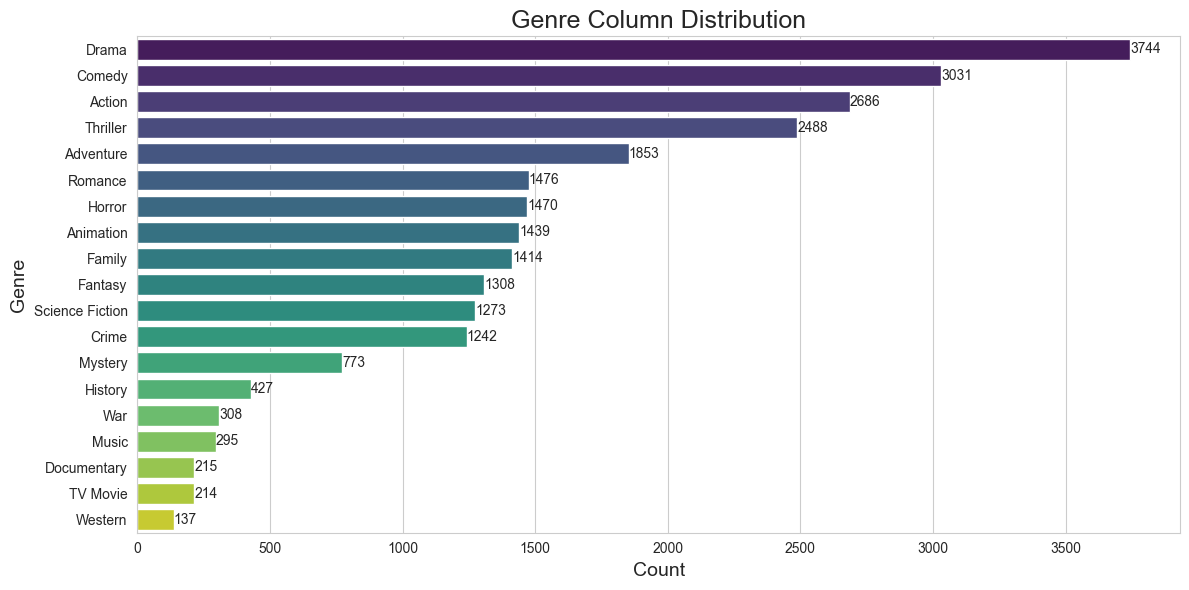

In [6]:
# Plot: Genre Distribution
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
bars = sns.countplot(
    y='Genre', 
    data=df, 
    palette='viridis', 
    order=df['Genre'].value_counts().index
)

# Adding labels to the bars
for container in bars.containers:
    bars.bar_label(container)

# Adding title and labels to the plot
plt.title('Genre Column Distribution', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('genre_column.png')  # Save the plot
plt.show()


C:\Users\nafay\AppData\Local\Temp\ipykernel_16372\3337003711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x=gb.index, y=gb.values, palette='coolwarm')


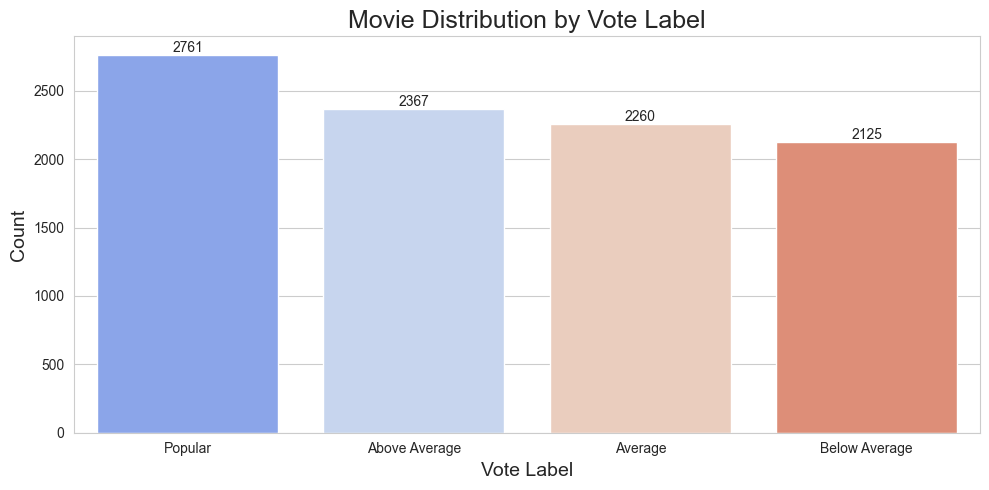

In [7]:
# Plot: Movie Distribution by Vote Label (Removing duplicates)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')

# Drop duplicate movies before counting vote labels
gb = df.drop_duplicates(subset='Title')['Vote_Label'].value_counts()

bars2 = sns.barplot(x=gb.index, y=gb.values, palette='coolwarm')
for container in bars2.containers:
    bars2.bar_label(container)

# Adding title and labels
plt.title('Movie Distribution by Vote Label', fontsize=18)
plt.xlabel('Vote Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('movie_popularity.png')
plt.show()


C:\Users\nafay\AppData\Local\Temp\ipykernel_16372\1616239667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars3 = sns.barplot(x='Popularity', y='Title', data=top_10, palette='plasma')


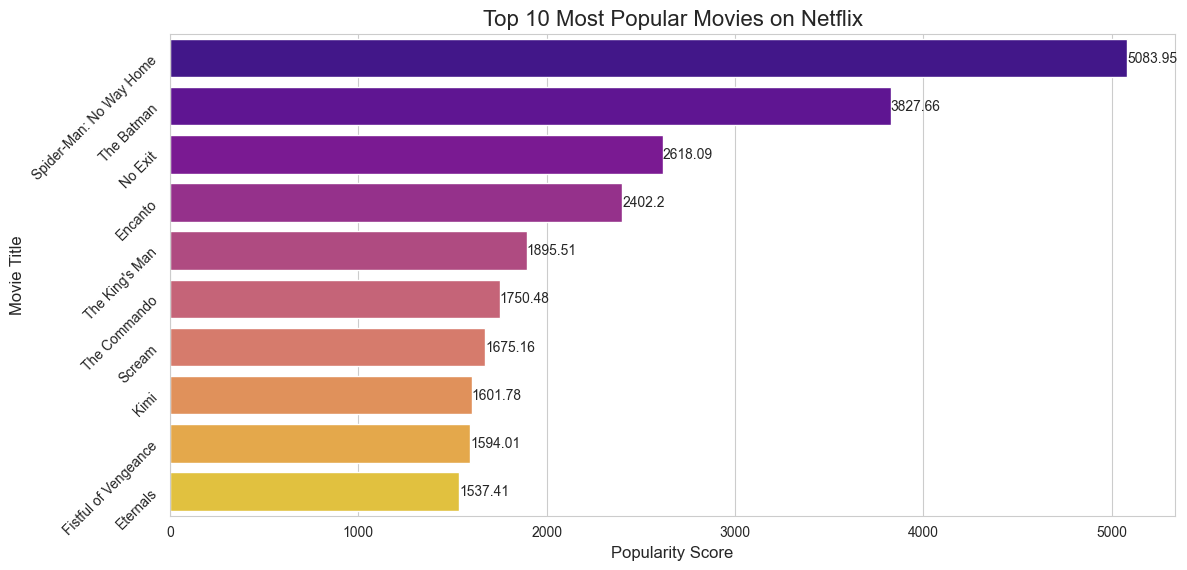

In [8]:
# Top 10 most popular movies based on 'Popularity' score
top_10 = df.drop_duplicates(subset='Title').sort_values(by='Popularity', ascending=False).head(10)

# Plot: Top 10 Most Popular Movies
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
bars3 = sns.barplot(x='Popularity', y='Title', data=top_10, palette='plasma')

# Adding labels to the bars
for container in bars3.containers:
    bars3.bar_label(container)

# Rotate Y-ticks and adjust layout
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Adding title and labels
plt.title('Top 10 Most Popular Movies on Netflix', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)

# Save the plot and display
plt.savefig('top_10_movies.png')
plt.show()


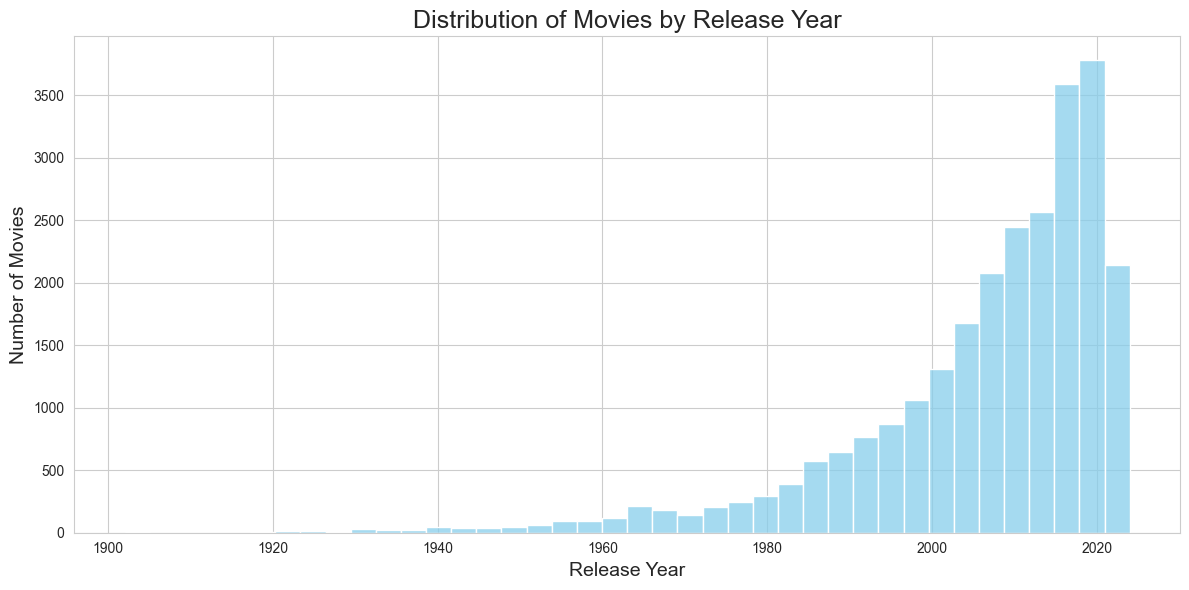

In [9]:
# Plot: Distribution of Movies by Release Year
plt.figure(figsize=(12, 6))
sns.histplot(df['Release_Date'], kde=False, bins=40, color='skyblue')

# Adding title and labels
plt.title('Distribution of Movies by Release Year', fontsize=18)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
